In [99]:

import pandas as pd
import math 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date

## 1. Data Cleaning Customer Address

In [100]:
df_cust = pd.read_excel('Raw_data.xlsx' , sheet_name = 'CustomerAddress') 

In [101]:
df_cust.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [102]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [103]:
print("Total records (rows) in the dataset : {}".format(df_cust.shape[0]))
print("Total columns (features) in the dataset : {}".format(df_cust.shape[1]))

Total records (rows) in the dataset : 3999
Total columns (features) in the dataset : 6


In [104]:
#missing values 

df_cust.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

**There is no missing values in the data set**

In [105]:
#inconsistency check

df_cust['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

in state col, some of values are using there full form also so unifying theme by replacing their short form



In [106]:
#function for replacing state names with there short forms

def replace_col(state_name):
    if state_name == 'New South Wales':
        return 'NSW'
    elif state_name == 'Victoria':
        return 'VIC'
    else :
       return state_name 

df_cust['state'] = df_cust['state'].apply(replace_col)
df_cust['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

Now state col is unifyed 

In [107]:
#country col 
df_cust['country'].value_counts()

Australia    3999
Name: country, dtype: int64

In country col evrything is correct 

In [108]:
#droping dublicate if have
df_cust[['address' , 'postcode' ,'state','country']].drop_duplicates()

,address,postcode,state,country
0,060 Morning Avenue,2016,NSW,Australia
1,6 Meadow Vale Court,2153,NSW,Australia
2,0 Holy Cross Court,4211,QLD,Australia
3,17979 Del Mar Point,2448,NSW,Australia
4,9 Oakridge Court,3216,VIC,Australia
...,...,...,...,...
3994,1482 Hauk Trail,3064,VIC,Australia
3995,57042 Village Green Point,4511,QLD,Australia
3996,87 Crescent Oaks Alley,2756,NSW,Australia
3997,8194 Lien Street,4032,QLD,Australia


getting the same row as we getting in starting

In [109]:
#exporting cleaned data into csv fromet

df_cust.to_csv('CustomerAddress_Cleaned.csv', index=False)


## 2. Data Cleaning Customer Demographics 

In [110]:
df_cust_details =  pd.read_excel('Raw_data.xlsx' , sheet_name = 'CustomerDemographic' ) 

C:\Users\yadav\AppData\Local\Temp\ipykernel_7588\783563632.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df_cust_details =  pd.read_excel('Raw_data.xlsx' , sheet_name = 'CustomerDemographic' )


In [111]:
df_cust_details.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [112]:
df_cust_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

**default** column seems irrelevant it should be drop from the data set

In [113]:
#droping irrelevant col
df_cust_details.drop(labels={'default'} , axis=1 , inplace=True)

In [114]:
#shape of data set
print("Total records (rows) in the dataset : {}".format(df_cust_details.shape[0]))
print("Total columns (features) in the dataset : {}".format(df_cust_details.shape[1]))

Total records (rows) in the dataset : 4000
Total columns (features) in the dataset : 12


In [115]:
#missing values check

df_cust_details.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [116]:
# Percentage of missing values
df_cust_details.isnull().mean()*100

customer_id                             0.000
first_name                              0.000
last_name                               3.125
gender                                  0.000
past_3_years_bike_related_purchases     0.000
DOB                                     2.175
job_title                              12.650
job_industry_category                  16.400
wealth_segment                          0.000
deceased_indicator                      0.000
owns_car                                0.000
tenure                                  2.175
dtype: float64

1. some column have missing values col name is last_name,job_title , job_industry_category and tenure
2. as customer_id and first_name have no missing value so we can just fill NAN's with any value in last_name column


In [117]:
df_cust_details['last_name'] = df_cust_details['last_name'].fillna('None' , axis=0 )

In [118]:
df_cust_details['last_name'].isnull().sum()

0

Currently there are no missing values for last name column

In [119]:
#filling DOB col missing values 

df_cust_details['DOB'].isnull().mean()*100

2.175

In DOB column Percentage of missing value is less then 5%. hance we can drop that rows that  have null value 

In [120]:
drop_index = df_cust_details[df_cust_details['DOB'].isnull()].index
drop_index

Int64Index([ 143,  167,  266,  289,  450,  452,  453,  479,  512,  525,  547,
             581,  598,  679,  684,  798,  838,  882,  891,  949,  974,  982,
             995, 1037, 1043, 1081, 1173, 1209, 1243, 1350, 1476, 1508, 1582,
            1627, 1682, 1739, 1772, 1779, 1805, 1917, 1937, 1989, 1999, 2020,
            2068, 2164, 2204, 2251, 2294, 2334, 2340, 2413, 2425, 2468, 2539,
            2641, 2646, 2695, 2696, 2853, 2919, 2962, 2998, 3011, 3085, 3150,
            3221, 3222, 3254, 3287, 3297, 3311, 3321, 3342, 3364, 3472, 3509,
            3512, 3564, 3653, 3717, 3726, 3778, 3882, 3930, 3934, 3997],
           dtype='int64')

In [121]:
df_cust_details.drop(index=drop_index , axis=0, inplace=True)

In [122]:
df_cust_details['DOB'].isnull().mean()*100

0.0

1. now DOB column have zero missing value
2. DOB and tenure both column had same missing values index hance tenure column is also zero missing value now

In [123]:
df_cust_details['tenure'].isnull().mean()*100

0.0

In [124]:
#counverting datatype of DOB column into Date

df_cust_details['DOB'] = pd.to_datetime(df_cust_details['DOB'])

In [125]:
#adding age column

def cal_age(DOB):
    today = date.today()
    return today.year - DOB.year - ((today.month,today.day) < (DOB.month,DOB.day) )

df_cust_details['age'] = df_cust_details['DOB'].apply(cal_age)

<AxesSubplot:xlabel='age', ylabel='Count'>

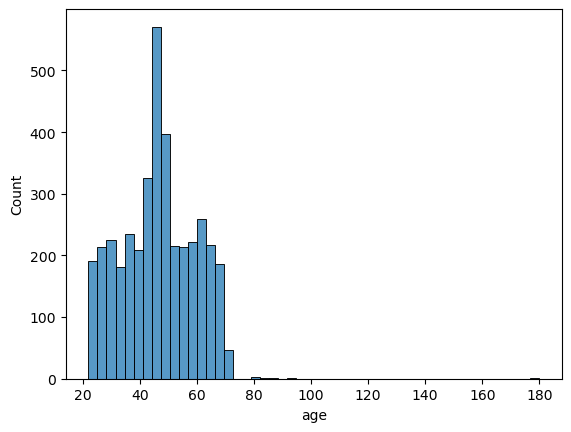

In [126]:
#age distribution
sns.histplot(df_cust_details['age'], kde =False , bins = 50 )

In [127]:
#Statistics of the Age column
df_cust_details['age'].describe()

count    3913.000000
mean       46.426783
std        12.798694
min        22.000000
25%        37.000000
50%        46.000000
75%        56.000000
max       180.000000
Name: age, dtype: float64

Here max age is 180 but 75ntill is 56 hance this is a outlier and droping it  

In [128]:
df_cust_details[df_cust_details['age']>100]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,180


In [129]:
#droping this record
o_index = df_cust_details[df_cust_details['age']>100].index
df_cust_details.drop(index=o_index , inplace=True , axis=0)


In [130]:
#adding age group col

df_cust_details['Age Group'] = df_cust_details['age'].apply(lambda x : (math.floor(x/10)+1)*10)

<AxesSubplot:xlabel='Age Group', ylabel='Count'>

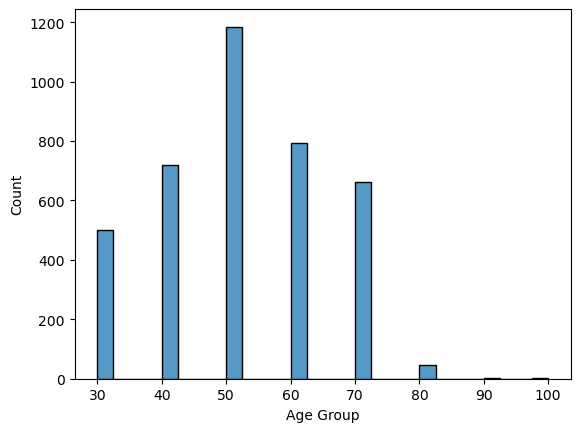

In [131]:
sns.histplot(data = df_cust_details['Age Group'])

In [132]:
#filling job_titel col missing values 

df_cust_details['job_title'].isnull().mean()*100

12.704498977505112

here presentage of missing values is 13%.we will replace it with "Missing" 

In [133]:
df_cust_details['job_title'] = df_cust_details['job_title'].fillna("Missing" , axis=0 )
   
df_cust_details['job_title'].isnull().mean()*100


0.0

Currently there are no mssing values for job_title column.



In [134]:
#filling job_industry_category col missing values 

df_cust_details['job_industry_category'].isnull().mean()*100

16.768916155419223

same like Job_title column have to replace missing values with somthing like "Missing"

In [135]:
df_cust_details['job_industry_category'] = df_cust_details['job_industry_category'].fillna("Missing"  , axis=0 )
   
df_cust_details['job_industry_category'].isnull().mean()*100

0.0

Currently there are no mssing values for job_industry_category column.

In [136]:
# Inconsistency Check in category colume
df_cust_details.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,Age Group
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,70,80
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,43,50
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,70,80
3,4,Talbot,None,Male,33,1961-10-03,Missing,IT,Mass Customer,N,No,7.0,62,70
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Missing,Affluent Customer,N,Yes,8.0,47,50


By observing above table.there are four categorical columns, their name as 'gender', 'wealth_segment' ,'deceased_indicator', 'owns_car'

In [137]:
#start with gender

df_cust_details['gender'].value_counts()

Female    2037
Male      1872
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [138]:
df_cust_details[df_cust_details['gender']=="U"].count()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
age                                    0
Age Group                              0
dtype: int64

In [139]:
#calculating % of "U" in gender col 
df_cust_details.gender[df_cust_details['gender']=="U"].count()/df_cust_details.gender.count()*100

0.0

1. have some Inconsistency in gender col. there are spelling mistake and typo.For gender with value M will be replaced with Male, F will be replaced by Female and Femal will be replaced by Female.
2. In gender col we have 87 record for "U" that is around 2% of their col, but we haven't DOB ,age  and tenure records in respective  of "U". droping this reords               



In [140]:
#droping U from gender col
U_index = df_cust_details[df_cust_details['gender']=="U"].index

df_cust_details.drop(index=U_index , inplace=True , axis=0)

In [141]:
#replacing 
def replace_gender_names(gender):
    
    # Making Gender as Male and Female as standards
    if gender=='M':
        return 'Male'
    elif gender=='F':
        return 'Female'
    elif gender=='Femal':
        return 'Female'
    else :
        return gender

df_cust_details['gender'] = df_cust_details['gender'].apply(replace_gender_names)

In [142]:
df_cust_details['gender'].value_counts()

Female    2039
Male      1873
Name: gender, dtype: int64

Now gerder column has resoved 

In [143]:
#Wealth Segment
df_cust_details['wealth_segment'].value_counts()

Mass Customer        1954
High Net Worth        996
Affluent Customer     962
Name: wealth_segment, dtype: int64

there is no Inconsistency in wealth_segment col

In [144]:
#deceased_indicator
df_cust_details['deceased_indicator'].value_counts()

N    3910
Y       2
Name: deceased_indicator, dtype: int64

there is no Inconsistency in deceased_indicator col

In [145]:
#owns_car
df_cust_details['owns_car'].value_counts()

Yes    1974
No     1938
Name: owns_car, dtype: int64

there is no Inconsistency in owns_car col

In [146]:
#Duplication Checks
cust_demo_dedupped = df_cust_details.drop('customer_id', axis=1).drop_duplicates()

print("Number of records after removing customer_id (pk), duplicates : {}".format(cust_demo_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(df_cust_details.shape[0]))

Number of records after removing customer_id (pk), duplicates : 3912
Number of records in original dataset : 3912


there is no Duplication in the dataset 

In [147]:
#exporting cleaned data

df_cust_details.to_csv('CustomerDemographic_Cleaned.csv', index=False)

## 3. Data Cleaning New Customer 

In [148]:
df_new_cust =  pd.read_excel('Raw_data.xlsx' , sheet_name = 'NewCustomerList' ) 

C:\Users\yadav\AppData\Local\Temp\ipykernel_7588\2202284216.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df_new_cust =  pd.read_excel('Raw_data.xlsx' , sheet_name = 'NewCustomerList' )


In [149]:
df_new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.81,1.0125,1.265625,1.075781,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.75,0.7500,0.937500,0.796875,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.71,0.7100,0.710000,0.710000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.50,0.6250,0.625000,0.625000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.99,0.9900,1.237500,1.237500,4,4,1.703125


In [150]:
#shape of dataset

print("Total records (rows) in the dataset : {}".format(df_new_cust.shape[0]))
print("Total columns (features) in the dataset : {}".format(df_new_cust.shape[1]))

Total records (rows) in the dataset : 1000
Total columns (features) in the dataset : 23


In [151]:
df_new_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

for now datatype is looking fine where as we have some irrelevant column, named as  "Unnamed: 16 " ,"Unnamed: 17",Unnamed: 18",Unnamed: 19" and "Unnamed: 20"

In [152]:
#droping irrelevant column

df_new_cust.drop(labels=['Unnamed: 16','Unnamed: 17', 'Unnamed: 18','Unnamed: 19','Unnamed: 20'] , inplace=True , axis=1)

In [153]:
#missing values treatment

df_new_cust.isnull().mean()*100

first_name                              0.0
last_name                               2.9
gender                                  0.0
past_3_years_bike_related_purchases     0.0
DOB                                     1.7
job_title                              10.6
job_industry_category                  16.5
wealth_segment                          0.0
deceased_indicator                      0.0
owns_car                                0.0
tenure                                  0.0
address                                 0.0
postcode                                0.0
state                                   0.0
country                                 0.0
property_valuation                      0.0
Rank                                    0.0
Value                                   0.0
dtype: float64

In this dataset four col are have missing valiues named as 'DOB' , 'job_title' , 'job_industry_category' and 'Last_name'                  

In [154]:
#last_name col cleaning :- since first_name has no missing value tho we can replace null values with something like 'None' 


In [155]:
df_new_cust['last_name'] = df_new_cust['last_name'].fillna("None" , axis= 0)

df_new_cust['last_name'].isnull().mean()*100

0.0

now last name has no missing value

In [156]:
#DOB col cleaning :- in this col missing value percentage is 3%. hance we can drop these records 
DOB_index = df_new_cust[df_new_cust['DOB'].isnull()].index
df_new_cust.drop(index=DOB_index , inplace=True ,axis=0)

df_new_cust['DOB'].isnull().sum()

0

now DOB has no missing value

In [157]:
#job_title col has missing value that is around 11%. We will replace null values with Missing

df_new_cust['job_title'] = df_new_cust['job_title'].fillna('Missing'  , axis= 0 )
df_new_cust['job_title'].isnull().sum()


0

now job_title has no missing value

In [158]:
#job_industry_category col has missing value that is around 11%. We will replace null values with Missing

df_new_cust['job_industry_category']= df_new_cust['job_industry_category'].fillna('Missing'  , axis= 0 )
df_new_cust['job_industry_category'].isnull().sum()


0

now job_industry_category has no missing value

In [159]:
#Inconsistency Check 
df_new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


By observing above table.there are six categorical columns, their name as 'gender', 'wealth_segment' ,'deceased_indicator', 'owns_car' ,'state' ,'country'

In [160]:
#start with gender col
df_new_cust['gender'].value_counts()

Female    513
Male      470
Name: gender, dtype: int64

there is no Inconsistency in gender col

In [161]:
df_new_cust['wealth_segment'].value_counts()

Mass Customer        499
High Net Worth       249
Affluent Customer    235
Name: wealth_segment, dtype: int64

there is no Inconsistency in wealth_segment col

In [162]:
df_new_cust['deceased_indicator'].value_counts()

N    983
Name: deceased_indicator, dtype: int64

In [163]:
df_new_cust['owns_car'].value_counts()

No     497
Yes    486
Name: owns_car, dtype: int64

there is no Inconsistency in owns_car col

In [164]:
df_new_cust['state'].value_counts()

NSW    499
VIC    258
QLD    226
Name: state, dtype: int64

there is no Inconsistency in state col

In [165]:
df_new_cust['country'].value_counts()

Australia    983
Name: country, dtype: int64

there is no Inconsistency in country col

In [166]:
df_new_cust['tenure'].describe()

count    983.000000
mean      11.459817
std        5.006123
min        1.000000
25%        8.000000
50%       11.000000
75%       15.000000
max       22.000000
Name: tenure, dtype: float64

<AxesSubplot:xlabel='tenure', ylabel='Count'>

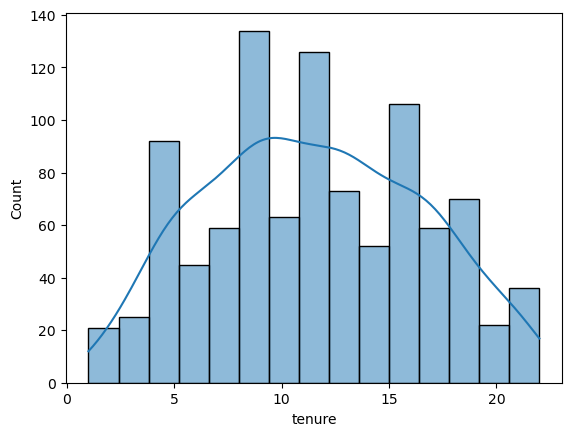

In [167]:
sns.histplot(data = df_new_cust['tenure'], kde=True)

there is no Inconsistency in tenure col it looks fine

In [168]:
#adding age column
def age(born):
    today = date.today()
    
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df_new_cust['DOB'] = pd.to_datetime(df_new_cust['DOB'])
df_new_cust['Age'] = df_new_cust['DOB'].apply(age)

In [169]:
#Descriptive Statistics of Age column
df_new_cust['Age'].describe()

count    983.000000
mean      52.648016
std       17.065532
min       22.000000
25%       41.000000
50%       52.000000
75%       66.000000
max       86.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

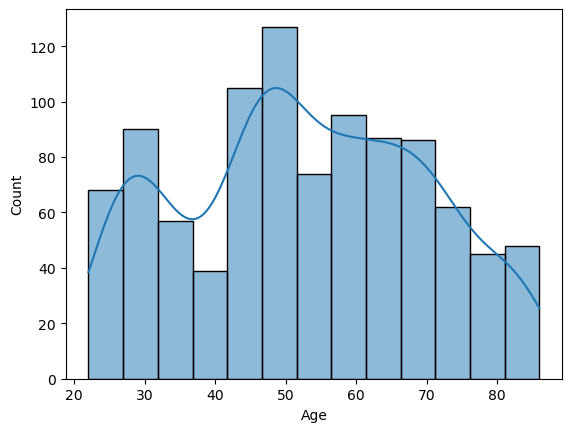

In [170]:
sns.histplot(data = df_new_cust['Age'], kde=True)

there is no Inconsistency in Age col it looks fine

In [171]:
#adding age group col

df_new_cust['Age Group'] = df_new_cust['Age'].apply(lambda x : (math.floor(x/10)+1)*10)

<AxesSubplot:xlabel='Age Group', ylabel='Count'>

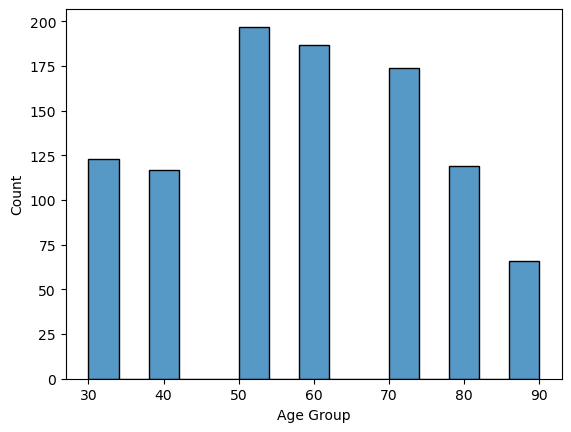

In [172]:
sns.histplot(data = df_new_cust['Age Group'])

The highest number of New Customers are from the Age Group 50-59.



In [173]:
#Duplication Checks
new_cust_dedupped = df_new_cust.drop_duplicates()

print("Number of records after removing customer_id (pk), duplicates : {}".format(new_cust_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(df_new_cust.shape[0]))

Number of records after removing customer_id (pk), duplicates : 983
Number of records in original dataset : 983


Since both the numbers are same. There are no duplicate records in the dataset.


In [174]:
#exporting Cleaned data

df_new_cust.to_csv('NewCustomerList_Cleaned.csv', index=False)

## 4. Data Cleaning Transactions

In [175]:
df_tranc =  pd.read_excel('Raw_data.xlsx' , sheet_name = 'Transactions' ) 

In [176]:
df_tranc.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [177]:
#shape of dataset

print("Total records (rows) in the dataset : {}".format(df_tranc.shape[0]))
print("Total columns (features) in the dataset : {}".format(df_tranc.shape[1]))

Total records (rows) in the dataset : 20000
Total columns (features) in the dataset : 13


In [178]:
df_tranc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

The datatype of product_first_sold_date column is not in datetime format. The data type of this column must be changed from int64 to datetime format.

In [179]:
#Percentage missing values
df_tranc.isnull().mean()*100

transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               1.800
order_status               0.000
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64

In [180]:
#Online_Order col:- Since 1.8 % of the records have online_order data missing we can perform mode imputation for this categorical column.

most_freq_online_mode = df_tranc['online_order'].mode()
most_freq_online_mode




0    1.0
Name: online_order, dtype: float64

Since 1 is the most frequent value of online order. We will do a mode imputation on this categorical value.



In [181]:
  df_tranc['online_order'] = df_tranc['online_order'].fillna(1, axis=0)


In [182]:
df_tranc['online_order'].isnull().sum()

0


Currently there are no missing values for online_order column

Remaining col that has null values, named as  Brand, Product Line, Product Class, Product Size, Standard Cost, Product First Sold Date. 
all these cols have less than 1% missing values. hence we can drop them


In [183]:
records_to_drop = df_tranc[df_tranc['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size', 
                                'standard_cost', 'product_first_sold_date']].index
records_to_drop

df_tranc.drop(index=records_to_drop ,inplace=True , axis=0)

In [184]:
df_tranc.isnull().mean()*100

transaction_id             0.0
product_id                 0.0
customer_id                0.0
transaction_date           0.0
online_order               0.0
order_status               0.0
brand                      0.0
product_line               0.0
product_class              0.0
product_size               0.0
list_price                 0.0
standard_cost              0.0
product_first_sold_date    0.0
dtype: float64

Finally there are no Missing values in the transaction dataset.



In [185]:
#Inconsistency Check
df_tranc.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


By observing above table.there are five categorical columns, their name as 'online_order', 'order_status' ,'product_line', 'product_class'  and 'brand'



In [186]:
#start with gender col
df_tranc['online_order'].value_counts()

1.0    10097
0.0     9706
Name: online_order, dtype: int64

there is no Inconsistency in online_order col

In [187]:
df_tranc['order_status'].value_counts()

Approved     19625
Cancelled      178
Name: order_status, dtype: int64

there is no Inconsistency in order_status col

In [188]:
df_tranc['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

there is no Inconsistency in product_line col

In [189]:
df_tranc['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

there is no Inconsistency in product_class col

In [190]:
df_tranc['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

there is no Inconsistency in brand col

In [191]:
#Duplication Checks

trans_dedupped = df_tranc.drop('transaction_id', axis=1).drop_duplicates()

print("Number of records after removing customer_id (pk), duplicates : {}".format(trans_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(df_tranc.shape[0]))

Number of records after removing customer_id (pk), duplicates : 19803
Number of records in original dataset : 19803


Since both the numbers are same. There are no duplicate records in the dataset



In [192]:
#Creating a new feature "Profit" :- profit is the difference of standard_cost and list_price
df_tranc['Profit'] = df_tranc['list_price']-df_tranc['standard_cost']

<AxesSubplot:xlabel='Profit', ylabel='Count'>

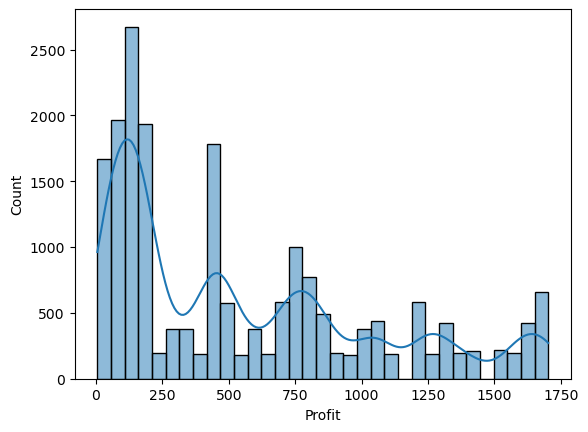

In [193]:
# Dystribution of the Profit Column

sns.histplot(df_tranc['Profit'] , kde=True)

In [194]:
#Exporting Cleaned  data 
df_tranc.to_csv('Transactions_Cleaned.csv', index=False)

We have Cleaned all the data. now is time to perform Exploratory Data Analysis (EDA)
                                                 